In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:

df_puebla= pd.read_csv('./data/puebla.csv').set_index(['year']).rename(columns={'avg_temp':'puebla_avg_temp'})
df_global= pd.read_csv('./data/global.csv').set_index(['year']).rename(columns={'avg_temp':'global_avg_temp'})
df = df_puebla.merge(df_global, left_index=True, right_index=True, how = 'right')

/Users/rene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  This is separate from the ipykernel package so we can avoid doing imports until


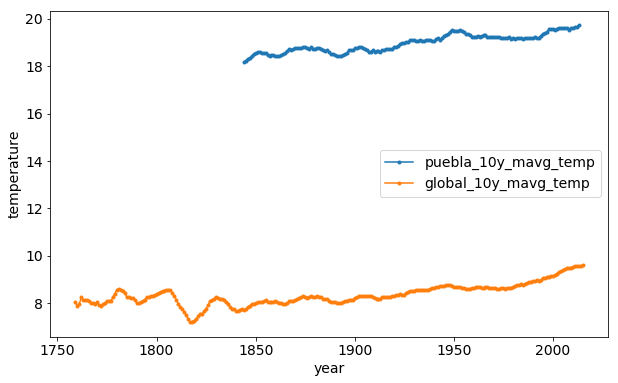

In [57]:
def plot_mvg(roller=5):

    df_mavg = df.rolling(roller).apply(np.nanmean).rename(columns={'puebla_avg_temp':'puebla_10y_mavg_temp',
                                                              'global_avg_temp':'global_10y_mavg_temp'})

    plt.rc('xtick', labelsize=14) 
    plt.rc('ytick', labelsize=14) 
    
    g = df_mavg.plot(style='.-', figsize=(10,6))
    g.legend(loc=5, prop={'size': 14})
    g.set_ylabel("temperature", fontsize=14 )
    g.set_xlabel("year", fontsize=14 )
    fig = g.get_figure()
    fig.savefig('./plots_tables/puebla_vs_global.png')
    
plot_mvg(10)

/Users/rene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  """


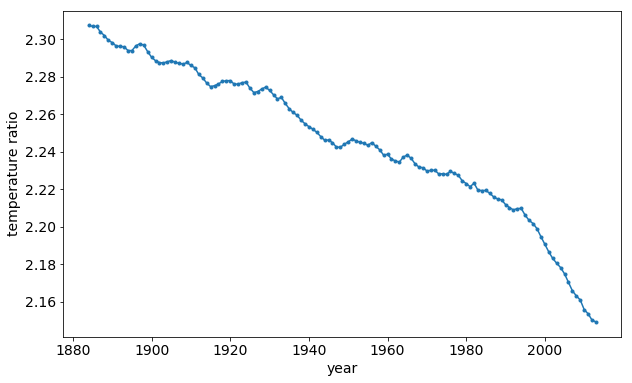

In [55]:
def plot_mvg_ratio(roller=5):
    fig=plt.figure(figsize=(10,6))
    plt.rc('xtick', labelsize=14) 
    plt.rc('ytick', labelsize=14) 
    df_aux = (df['puebla_avg_temp']/df['global_avg_temp']).rolling(roller).apply(np.nanmean)
    g = df_aux.plot(style='.-')
    g.set_ylabel("temperature ratio", fontsize=14 )
    g.set_xlabel("year", fontsize=14 )
    fig.savefig('./plots_tables/puebla_global_ratio.png')
plot_mvg_ratio(50)